https://blog.csdn.net/brucewong0516/article/details/81050939


# 1、多线程的理解

多进程和多线程都可以执行多个任务，线程是进程的一部分。线程的特点是**线程之间可以共享内存和变量，资源消耗少**，缺点是**线程之间的同步和加锁比较麻烦**。

一般线程的运行逻辑，如图：
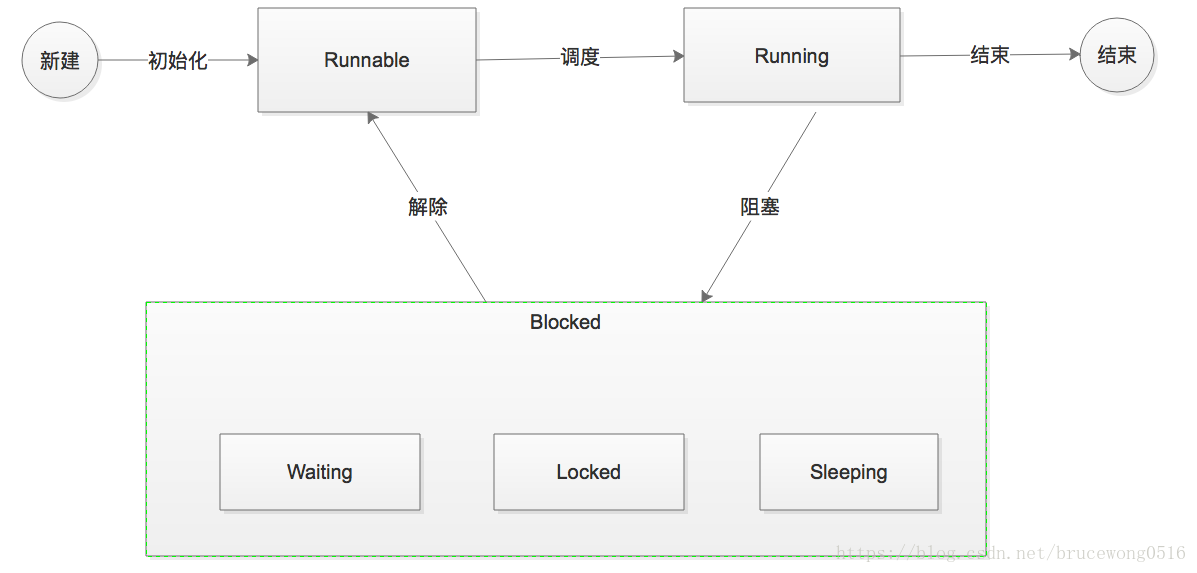

新建:使用线程的第一步就是创建线程,创建后的线程只是进入可执行的状态,也就是Runnable  
Runnable:进入此状态的线程还并未开始运行,一旦CPU分配时间片给这个线程后,该线程才正式的开始运行  
Running:线程正式开始运行,在运行过程中线程可能会进入阻塞的状态,即Blocked  
Blocked:在该状态下,线程暂停运行,解除阻塞后,线程会进入Runnable状态,等待CPU再次分配时间片给它  
结束:线程方法执行完毕或者因为异常终止返回  

其中最复杂的是线程从Running进入Blocked状态,通常有三种情况:  

睡眠:线程主动调用**sleep()或join()**方法后.  
等待:线程中调用**wait()方法,此时需要有其他线程通过notify()**方法来唤醒  
同步:线程中获取线程锁,但是因为资源已经被其他线程占用时.  


# 2、Python多线程创建

在Python3中，同样可以实现多线程，有两个标准模块`_thread`和`threadin`g，不过我们主要使用更高级的`threading`模块。
实例：

In [1]:
import threading
import time
#定义线程需要做的内容，写在函数里面
def target():
    print('当前的线程%s 在运行' % threading.current_thread().name)
    time.sleep(3)
    print('当前的线程 %s 结束' % threading.current_thread().name)

print('当前的线程 %s 在运行' % threading.current_thread().name)
t = threading.Thread(target=target,args = [])
 
t.start()  #线程启动
print('当前的线程 %s 结束' % threading.current_thread().name)


当前的线程 MainThread 在运行
当前的线程Thread-5 (target) 在运行
当前的线程 MainThread 结束


从结果可以看出，主线程结束后，子线程还没有运行结束；这时候为了让子进程先与主进程结束，可以调用`join( )`函数；

`join( )`函数：join所完成的工作就是**线程同步，即主线程任务结束之前，进入阻塞状态，一直等待其他的子线程执行结束之后，主线程再终止**。


join有一个timeout参数： 

当设置守护线程时【setDaemon(True)】，含义是**主线程对于子线程等待timeout的时间将会杀死该子线程，最后退出程序**。所以说，如果有10个子线程，全部的等待时间就是每个timeout的累加和。简单的来说，就是给每个子线程一个timeout的时间，让他去执行，时间一到，不管任务有没有完成，直接杀死。  

没有设置守护线程时，主线程将会等待timeout的累加和这样的一段时间，时间一到，主线程结束，但是并没有杀死子线程，子线程依然可以继续执行，直到子线程全部结束，程序退出。


In [2]:
import threading
import time
 
def target():
    print('当前的线程%s 在运行' % threading.current_thread().name)
    time.sleep(3)
    print('当前的线程 %s 结束' % threading.current_thread().name)
 
print('当前的线程 %s 在运行' % threading.current_thread().name)
t = threading.Thread(target=target,args = [])
 
t.start()
t.join() #阻塞进程
print('当前的线程 %s 结束' % threading.current_thread().name)


当前的线程 MainThread 在运行
当前的线程Thread-6 (target) 在运行
当前的线程 Thread-5 (target) 结束
当前的线程 Thread-6 (target) 结束
当前的线程 MainThread 结束


但如果为线程实例添加t.daemon=True守护进程之后，如果不加join语句，那么当主线程结束之后，会杀死子线程。如果加上join,并设置等待时间，就会等待线程一段时间再退出：

首先看一下守护进程机制：

```python
import time
import threading

def run():
    time.sleep(2)
    print('current thread name: ', threading.current_thread().name)
    time.sleep(2)
    print('current thread end： ', threading.current_thread().name)


if __name__ == '__main__':

    start_time = time.time()

    print('main thread:', threading.current_thread().name)
    thread_list = []
    for i in range(5):
        t = threading.Thread(target=run)
        thread_list.append(t)

    for t in thread_list:
        t.daemon = True
        t.start()

    print('main thread end', threading.current_thread().name)
    print('total time', time.time()-start_time)
```

In [9]:
!python thread_deamon_1.py

main thread: MainThread
main thread end MainThread
total time 0.0019652843475341797


可以看出当设置守护进程(通过调用 thread 线程的 daemon 属性并赋值为 True，则该 thread 线程就变成了守护线程)后，主线程结束就结束了整个进程，子线程也会结束并停止打印。

然后加上join( ),如果加上join,并设置等待时间，就会等待线程一段时间再退出:  
```python
import time
import threading

def run():
    time.sleep(2)
    print('current thread name: ', threading.current_thread().name)
    time.sleep(2)
    print('current thread end： ', threading.current_thread().name)


if __name__ == '__main__':

    start_time = time.time()

    print('main thread:', threading.current_thread().name)
    thread_list = []
    for i in range(5):
        t = threading.Thread(target=run)
        thread_list.append(t)

    for t in thread_list:
        t.daemon = True
        t.start()

    for t in thread_list:
        t.join(6)

    print('main thread end', threading.current_thread().name)
    print('total time', time.time()-start_time)
```

In [11]:
!python thread_deamon_2.py

main thread: MainThread
current thread name:  Thread-4 (run)
current thread name:  Thread-5 (run)
current thread name:  Thread-3 (run)
current thread name:  Thread-1 (run)
current thread name:  Thread-2 (run)
current thread end:  Thread-4 (run)
current thread end:  Thread-5 (run)
current thread end:  Thread-2 (run)
current thread end:  Thread-1 (run)
current thread end:  Thread-3 (run)
main thread end MainThread
total time 4.005788326263428
